In [1]:
'''sequence data should be handle  :required : special type
Neural network  : Recurrent neural network
sequence data cannot handle ANN means artificial neural network or traditional neural network .
ANN or traditional NN : It is unable to handle to sequence data or you can says to capture right
sequence of the token in given sentence'''

'sequence data should be handle  :required : special type\nNeural network  : Recurrent neural network\nsequence data cannot handle ANN means artificial neural network or traditional neural network .\nANN or traditional NN : It is unable to handle to sequence data or you can says to capture right\nsequence of the token in given sentence'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/deep learning/review.csv')
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.dtypes

review       object
sentiment     int64
dtype: object

In [9]:
df['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

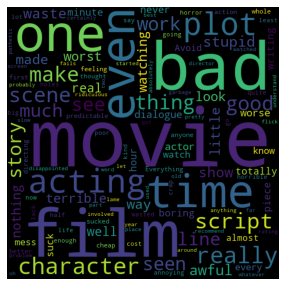

In [10]:
# 0 -ve review,1 +ve review
from wordcloud import WordCloud
#create object
wc=WordCloud(width=500,height=500,background_color='black',min_font_size=10)

#generate
wc.generate(''.join(df[df['sentiment']==0]['review']))

#show wordcloud
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

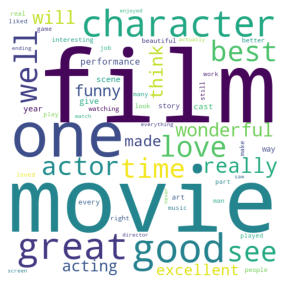

In [11]:
# 0 -ve review,1 +ve review
from wordcloud import WordCloud
#create object
wc=WordCloud(width=500,height=500,background_color='white',min_font_size=10)

#generate
wc.generate(''.join(df[df['sentiment']==1]['review']))

#show wordcloud
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [12]:
#create function for text preprocessing
def clean_text(text):
    #convert in lower case
    text=text.lower()
    #print(text)
    
    #2nd step,apply tokenizer
    tokens=word_tokenize(text)
    #print('tokens')
    
    #use isalpha()  to print alphabates  and remove no.s and special char.
    word_tokens=[t for t in tokens if t.isalpha()]
    #print(word_tokens)
    
    #create list for stopwords to remove is,am,a...
    stop=stopwords.words('english')
    clean_tokens=[t for t in word_tokens if t  not in stop]
    #print(clean_tokens)
    
    #create the object of WordNetLemmatizer class
    lemma=WordNetLemmatizer()
    lemma_token=[lemma.lemmatize(t) for t in clean_tokens]
    return ' '.join(lemma_token)

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
#apply clean_text function on column  of review
df['review']=df['review'].apply(clean_text)
df['review']

0      sure lost flat character audience nearly half ...
1      attempting artiness black white clever camera ...
2                            little music anything speak
3      best scene movie gerardo trying find song keep...
4      rest movie lack art charm meaning emptiness wo...
                             ...                        
994        got bored watching jessice lange take clothes
995    unfortunately virtue film production work lost...
996                                    word embarrassing
997                                    exceptionally bad
998             insult one intelligence huge waste money
Name: review, Length: 999, dtype: object

In [15]:
#select input and output
X=df['review']
Y=df['sentiment']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [17]:
X_train.shape,X_test.shape

((799,), (200,))

In [18]:
#declare empty list
sent_len=[]
for sent in df['review']:
  #add
  sent_len.append(len(word_tokenize(sent)))

#add column
df['length']=sent_len
df.head()

,review,sentiment,length
0,sure lost flat character audience nearly half ...,0,8
1,attempting artiness black white clever camera ...,0,17
2,little music anything speak,0,4
3,best scene movie gerardo trying find song keep...,1,10
4,rest movie lack art charm meaning emptiness wo...,0,10


In [19]:
#find the length of row having maximum words
max(df['length'])

38

In [20]:
df['length'].value_counts()

5     126
3     108
4     104
2      94
7      82
6      74
8      62
9      62
1      39
11     38
10     38
12     38
14     25
13     24
15     14
16     12
17     10
21      8
19      8
18      7
20      5
24      3
26      3
0       3
23      2
28      2
22      2
36      1
33      1
31      1
27      1
38      1
25      1
Name: length, dtype: int64

In [21]:
#take 95% review and 5% review sacrifice
np.quantile(df['length'],0.95)

17.0

In [22]:
#review text lengths are less than or equal to 17.
max_len=17

In [23]:
#check relation between words
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [24]:
tok=Tokenizer(char_level=False,split=' ') 

tok.fit_on_texts(X_train)   #80% training data

In [25]:
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'bad',
 5: 'character',
 6: 'good',
 7: 'like',
 8: 'time',
 9: 'even',
 10: 'acting',
 11: 'really',
 12: 'great',
 13: 'well',
 14: 'scene',
 15: 'see',
 16: 'story',
 17: 'make',
 18: 'actor',
 19: 'best',
 20: 'work',
 21: 'made',
 22: 'could',
 23: 'plot',
 24: 'think',
 25: 'thing',
 26: 'look',
 27: 'ever',
 28: 'seen',
 29: 'script',
 30: 'love',
 31: 'better',
 32: 'way',
 33: 'wonderful',
 34: 'would',
 35: 'year',
 36: 'real',
 37: 'also',
 38: 'much',
 39: 'watch',
 40: 'watching',
 41: 'line',
 42: 'performance',
 43: 'part',
 44: 'never',
 45: 'excellent',
 46: 'stupid',
 47: 'show',
 48: 'cast',
 49: 'life',
 50: 'anyone',
 51: 'little',
 52: 'go',
 53: 'nothing',
 54: 'get',
 55: 'every',
 56: 'know',
 57: 'give',
 58: 'people',
 59: 'two',
 60: 'music',
 61: 'recommend',
 62: 'funny',
 63: 'say',
 64: 'pretty',
 65: 'dialogue',
 66: 'art',
 67: 'saw',
 68: 'waste',
 69: 'awful',
 70: 'terrible',
 71: 'man',
 72: 'many',
 73: 'lot

In [26]:
#one boring pointless movie ever seen
#3     106   314       1    14    28
#0 0 0 0 0 0 0 0 0 0 0  3  106   314   1 14  28

In [27]:
#convert words into vector
sequences_train=tok.texts_to_sequences(X_train)
sequences_train

[[181, 121, 825, 20, 122, 105, 826, 74, 313],
 [3, 106, 314, 1, 27, 28],
 [827, 1, 6],
 [315, 182, 38, 828, 316, 317],
 [142, 829, 830, 318, 47, 4, 9, 481, 48, 319, 320, 47],
 [831,
  832,
  27,
  12,
  482,
  183,
  16,
  833,
  321,
  184,
  834,
  835,
  836,
  185,
  837,
  838,
  183,
  107,
  186,
  236],
 [24, 2, 322, 839, 483, 840, 55, 75],
 [187, 5, 188, 237, 841],
 [11, 6, 47, 39],
 [484, 842, 189, 323, 143, 324, 843, 5, 49],
 [844, 845, 846],
 [74, 485, 2, 847, 848, 849, 850, 48],
 [238],
 [486, 76, 4, 325, 2, 121, 11, 7, 190, 2, 4, 144, 3, 145, 50, 22, 487],
 [851, 108, 123, 4, 63],
 [16, 488, 852, 853, 854, 489, 35, 490, 11, 491, 855, 492, 493, 5, 856],
 [56, 239],
 [29, 29],
 [56, 857, 858, 326, 22, 38, 859, 13, 860],
 [57, 3, 861],
 [108,
  1,
  494,
  9,
  862,
  63,
  327,
  328,
  495,
  146,
  191,
  17,
  329,
  496,
  147,
  192,
  497,
  191,
  17,
  329,
  25],
 [3, 106, 148, 1, 863, 330, 238, 864, 106, 865],
 [498, 866, 40, 2],
 [16, 41, 77, 86],
 [331, 867, 63,

In [28]:
sequences_train[8]

[11, 6, 47, 39]

In [29]:
X_train.head(9)

382    set especially designed work camera amazing st...
904                 one boring pointless movie ever seen
981                                       sad movie good
47             whatever cost much translate quality sure
521    rating grade z note show bad even mother cast ...
635    jimmy stewart ever great hero hitchcock story ...
19     think film something vitally important occurs ...
366             new character memorable found forgetting
340                               really good show watch
Name: review, dtype: object

In [30]:
#apply padding  of maximum length of sentence which is 17. 
sequence_train_matrix=sequence.pad_sequences(sequences_train,maxlen=max_len)

In [31]:
sequence_train_matrix[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 106,
       314,   1,  27,  28], dtype=int32)

In [32]:
#create recurrent neural network to create sequential model
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense,SimpleRNN,Dropout,Embedding,LSTM,GRU

In [34]:
vocab_len=len(tok.index_word)
vocab_len

2269

In [35]:
#create object
model=Sequential()

model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#2nd param =500 is the output len

#model.add(SimpleRNN(units=21,activation='tanh'))

#model.add(LSTM(64,activation='tanh'))    
#Long short term memory(eg.Ghajini) guess the next word of sentence.

model.add(GRU(64,activation='tanh'))

model.add(Dense(128,activation='relu'))   #hidden layer
model.add(Dropout(0.5))   #to remove overfitting

#output layer
model.add(Dense(1,activation='sigmoid'))

In [36]:
#compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
# Create Early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [38]:
model.fit(sequence_train_matrix,Y_train,batch_size=50,epochs=2000,validation_split=0.2,callbacks=callback)

Epoch 1/2000
13/13 [==============================] - 8s 201ms/step - loss: 0.6912 - accuracy: 0.5430 - val_loss: 0.6851 - val_accuracy: 0.6625
Epoch 2/2000
13/13 [==============================] - 1s 62ms/step - loss: 0.6495 - accuracy: 0.8498 - val_loss: 0.6451 - val_accuracy: 0.7188
Epoch 3/2000
13/13 [==============================] - 1s 60ms/step - loss: 0.4475 - accuracy: 0.9343 - val_loss: 0.5015 - val_accuracy: 0.7937
Epoch 4/2000
13/13 [==============================] - 1s 60ms/step - loss: 0.1274 - accuracy: 0.9734 - val_loss: 0.6550 - val_accuracy: 0.8062
Epoch 5/2000
13/13 [==============================] - 1s 65ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.7725 - val_accuracy: 0.7937
Epoch 6/2000
13/13 [==============================] - 1s 60ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.9242 - val_accuracy: 0.7812
Epoch 7/2000
13/13 [==============================] - 1s 60ms/step - loss: 0.0106 - accuracy: 0.9937 - val_loss: 1.0492 - val_accuracy: 0.775

In [39]:
#test with 20%data
sequence_matrix_test=sequence.pad_sequences(tok.texts_to_sequences(X_test),maxlen=max_len)


In [40]:
sequence_matrix_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        37, 119,   2,  17], dtype=int32)

In [41]:
Y_pred=model.predict(sequence_matrix_test).round(2)
Y_pred

array([[0.  ],
       [1.  ],
       [0.  ],
       [0.28],
       [0.01],
       [0.2 ],
       [1.  ],
       [0.98],
       [0.99],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.97],
       [0.02],
       [0.01],
       [0.  ],
       [0.16],
       [1.  ],
       [0.11],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.01],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.02],
       [1.  ],
       [1.  ],
       [0.99],
       [1.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.91],
       [0.  ],
       [0.  ],
       [0.03],
       [0.  ],
       [0.01],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.04],
       [0.  ],
       [0.2 ],
       [0.06],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.

In [42]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [43]:
#print classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       102
           1       0.74      0.78      0.76        98

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

[[75 27]
 [22 76]]
